# 1. Introduction to Dataset

This dataset is based on the how covid has affected employees in india.because of covid during lockdown unemployment has been increased in india.

Features:

This dataset contains the unemployment rate of all the states in India

Region = states in India

Date = date which the unemployment rate observed

Frequency = measuring frequency (Monthly)

Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India

Estimated Employed = percentage of people employed

Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force.

# 2. Load the Modules Required

In [108]:
#load require liabraries of python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 3. Load the Dataset

In [109]:
df = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


# 4.Exploratory Data Analysis

In [110]:
# overall info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [111]:
# numerical values 
df. describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [112]:
# Frequency Categorical data
df[' Frequency'].value_counts()

 Frequency
 M    267
Name: count, dtype: int64

### we can observe that Frequency is a categorical variable with only one type of data that is "M". So this feature will not help us in future.we can remove it

In [113]:
# Remove frequency column
df.drop(columns=[' Frequency'],axis=1,inplace=True)

In [114]:
# count of each category of region and region 1
print(df['Region.1'].value_counts())
print(df['Region'].value_counts())

Region.1
North        79
South        60
West         50
East         40
Northeast    38
Name: count, dtype: int64
Region
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64


### The data is uniformly distributed for each category

In [115]:
# finding the number of null values in data set
df.isnull().sum()

Region                                      0
 Date                                       0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

### No null values found in the dataset

In [116]:
# shape of the dataset
print("Number of rows- ",df.shape[0], "\nNumber of columns- ",df.shape[1])

Number of rows-  267 
Number of columns-  8


In [117]:
# type of data in the dataset
df.dtypes

Region                                       object
 Date                                        object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [118]:
# for better analysis with individual day, month ,year we can split
# d= day, m= month, y= year

df[["d", "m", "y"]] = df[' Date'].str.split("-", expand = True)
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,d,m,y
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,15.9129,79.74,31,01,2020
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,15.9129,79.74,29,02,2020
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South,15.9129,79.74,31,03,2020
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South,15.9129,79.74,30,04,2020
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South,15.9129,79.74,31,05,2020


In [119]:
# unique values
df.nunique()

Region                                       27
 Date                                        10
 Estimated Unemployment Rate (%)            252
 Estimated Employed                         267
 Estimated Labour Participation Rate (%)    248
Region.1                                      5
longitude                                    27
latitude                                     24
d                                             3
m                                            10
y                                             1
dtype: int64

### day has only 3 unique values and year has only 1 unique value. so we can drop year .

# Multivariate Analysis

In [120]:
# print the columns
df.columns

Index(['Region', ' Date', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'd', 'm', 'y'],
      dtype='object')

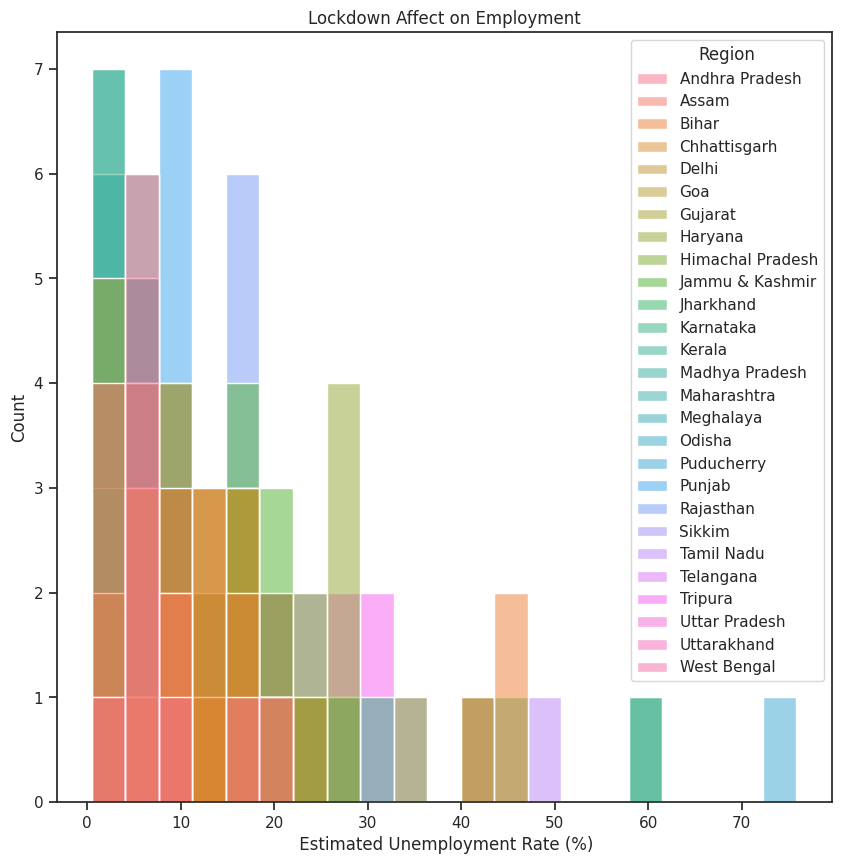

In [121]:
plt.figure(figsize=(10,10))
plt.title("Lockdown Affect on Employment")
sns.histplot(x=' Estimated Unemployment Rate (%)',hue= "Region", data=df,kde=False)
plt.show()
     

This histplot gives us the Estimated employment Rate in % for region wise.

<Axes: xlabel='m', ylabel=' Estimated Unemployment Rate (%)'>

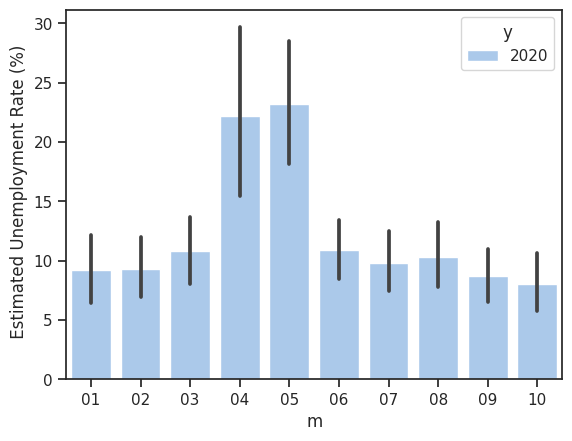

In [122]:
# month affect on unemployment
sns.barplot(x='m',y=' Estimated Unemployment Rate (%)',hue='y',data=df)

From above bar plot we can conclude that the 5th month in the year has highest unemployment rate of around 23 -24% and minimum in 10th month means the affect has been reduced.

<Axes: xlabel='d', ylabel=' Estimated Unemployment Rate (%)'>

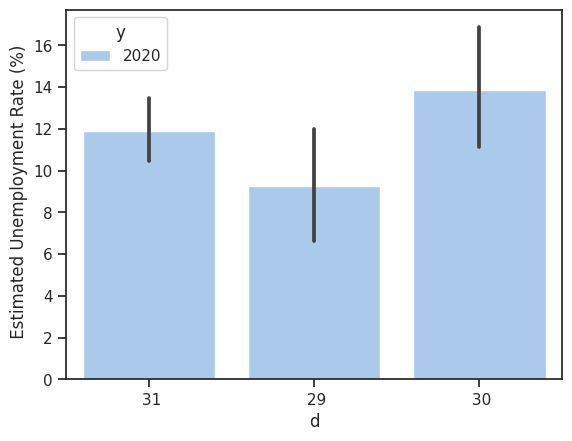

In [123]:
# affect of the day vs Unemplyment rate
sns.barplot(x='d',y=' Estimated Unemployment Rate (%)',hue='y',data=df)

From the above day wise unemplyment in each month we can see that in every month of 30th has highest number of emplyees lost their job.

In [124]:
# year on Estimated employment rate it has only one unique value. We can drop it
df['y'].value_counts()
df.drop(columns=["y"], axis= 1, inplace=True)

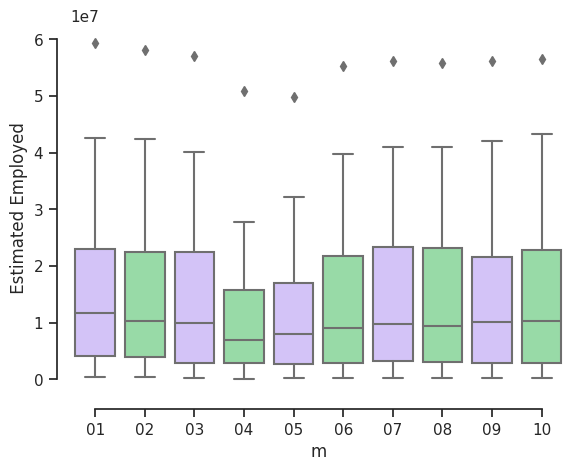

In [125]:
import seaborn as sns

# we can draw nested boxplot to show bills by day and time
sns.boxplot(x="m", y=' Estimated Employed', palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

From the above month wise estimated employees rate we can see in all months except 4 and 5th month people are got jobs.

### Region wise will see the affect of unemployment

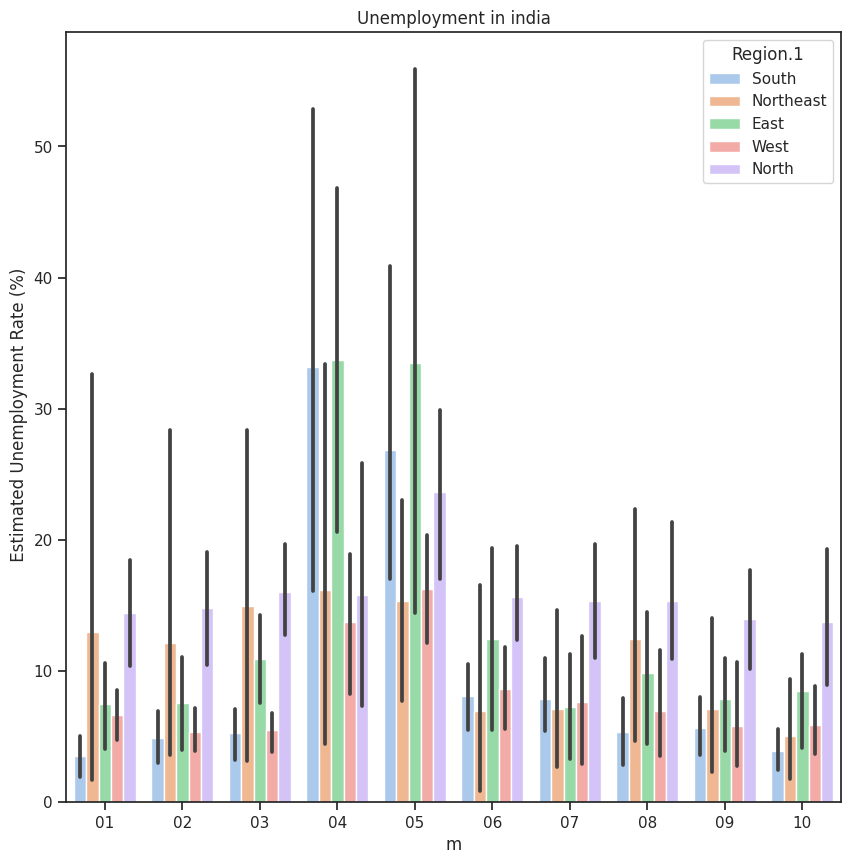

In [126]:
plt.figure(figsize=(10,10))
plt.title("Unemployment in india")
sns.barplot(x='m',y =' Estimated Unemployment Rate (%)',hue='Region.1', data=df)
plt.show()

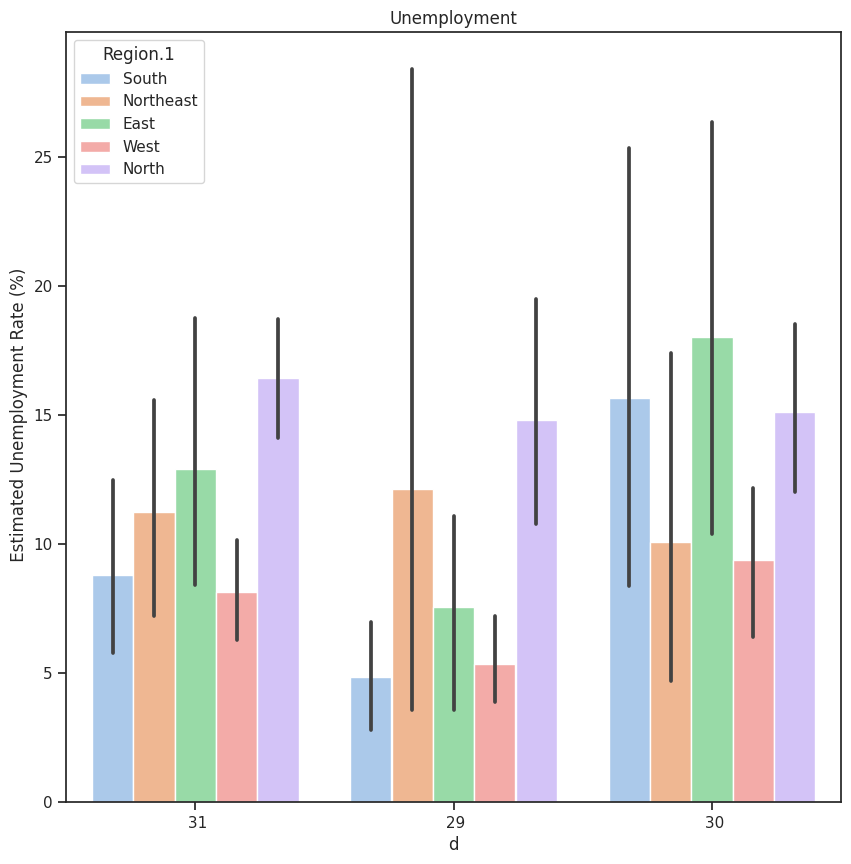

In [127]:
plt.figure(figsize=(10,10))
plt.title("Unemployment")
sns.barplot(x='d',y =' Estimated Unemployment Rate (%)',hue='Region.1', data=df)
plt.show()

From above we can see north and East Region has most unemployment on all the three days

In [128]:
# Using Pie chart 
unemp = df[["Region.1",' Estimated Employed']]
figure = px.sunburst(unemploment, path=["Region.1"], 
                     values=' Estimated Employed',
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Employment Rate in India Region wise")
figure.show()

From above we can conclude that North has maximum Employment.